In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("song_data.csv")
df.head()

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574

In [3]:
df.shape

(18835, 15)

# Data Cleaning

In [4]:
df.isna().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

# Exploiratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [6]:
df.describe()

song_popularity  song_duration_ms  acousticness  danceability  \
count     18835.000000      1.883500e+04  18835.000000  18835.000000   
mean         52.991877      2.182116e+05      0.258539      0.633348   
std          21.905654      5.988754e+04      0.288719      0.156723   
min           0.000000      1.200000e+04      0.000001      0.000000   
25%          40.000000      1.843395e+05      0.024100      0.533000   
50%          56.000000      2.113060e+05      0.132000      0.645000   
75%          69.000000      2.428440e+05      0.424000      0.748000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.644995          0.078008      5.289196      0.179650   
std        0.214101          0.221591      3.614595      0.143984   
min        0.001070          0.000000      0.000000      0.010900   
25%        0.510000          0.000000      2.000000      0.092900   
50%        0.674000          0.000011      5.000000      0.122000   
75%        0.815000          0.002570      8.000000      0.221000   
max        0.999000          0.997000     11.000000      0.986000   

           loudness    audio_mode   speechiness         tempo  time_signature  \
count  18835.000000  18835.000000  18835.000000  18835.000000    18835.000000   
mean      -7.447435      0.628139      0.102099    121.073154        3.959119   
std        3.827831      0.483314      0.104378     28.714456        0.298533   
min      -38.768000      0.000000      0.000000      0.000000        0.000000   
25%       -9.044000      0.000000      0.037800     98.368000        4.000000   
50%       -6.555000      1.000000      0.055500    120.013000        4.000000   
75%       -4.908000      1.000000      0.119000    139.931000        4.000000   
max        1.585000      1.000000      0.941000    242.318000        5.000000   

       audio_valence  
count   18835.000000  
mean        0.527967  
std         0.244632  
min         0.000000  
25%         0.335000  
50%         0.527000  
75%         0.725000  
max         0.984000

In [7]:
df["popularity"] = [ 1 if i>=66.5 else 0 for i in df.song_popularity ]
df["popularity"].value_counts()

0    13386
1     5449
Name: popularity, dtype: int64

- Checking the popularity rating of songs that have been popular in the last 10 years on Spotify and took the mean value of them (66.5) . According to this value, the songs that has rating above this value and could remain on the top of the lists for a long time. If song_popularity is higher than 66.5 (this is about 30% percent of data) we labeled it "1" and if it is not we labeled it "0". So we have "1" for the popular songs and "0" for the unpopular ones.

In [8]:
#getting the data of the popular songs
a=df[df["popularity"]==1]
a.describe()

song_popularity  song_duration_ms  acousticness  danceability  \
count      5449.000000       5449.000000   5449.000000   5449.000000   
mean         76.992292     218539.555515      0.210354      0.659758   
std           8.068717      48620.048311      0.246079      0.147652   
min          67.000000      67000.000000      0.000009      0.072200   
25%          71.000000     190185.000000      0.026300      0.562000   
50%          75.000000     212429.000000      0.106000      0.668000   
75%          82.000000     240533.000000      0.300000      0.765000   
max         100.000000     547733.000000      0.996000      0.978000   

            energy  instrumentalness         key     liveness     loudness  \
count  5449.000000       5449.000000  5449.00000  5449.000000  5449.000000   
mean      0.658601          0.022390     5.11782     0.174400    -6.624852   
std       0.187495          0.115572     3.65752     0.137557     3.139341   
min       0.002890          0.000000     0.00000     0.021500   -34.255000   
25%       0.541000          0.000000     1.00000     0.092000    -7.906000   
50%       0.680000          0.000000     5.00000     0.121000    -5.985000   
75%       0.802000          0.000118     8.00000     0.203000    -4.626000   
max       0.997000          0.968000    11.00000     0.978000    -0.739000   

        audio_mode  speechiness        tempo  time_signature  audio_valence  \
count  5449.000000  5449.000000  5449.000000     5449.000000    5449.000000   
mean      0.618829     0.106247   120.753878        3.974307       0.520436   
std       0.485719     0.102181    27.737971        0.255771       0.230911   
min       0.000000     0.022400    57.178000        1.000000       0.035200   
25%       0.000000     0.039100    98.883000        4.000000       0.336000   
50%       1.000000     0.059100   119.886000        4.000000       0.511000   
75%       1.000000     0.131000   139.910000        4.000000       0.701000   
max       1.000000     0.733000   212.058000        5.000000       0.980000   

       popularity  
count      5449.0  
mean          1.0  
std           0.0  
min           1.0  
25%           1.0  
50%           1.0  
75%           1.0  
max           1.0

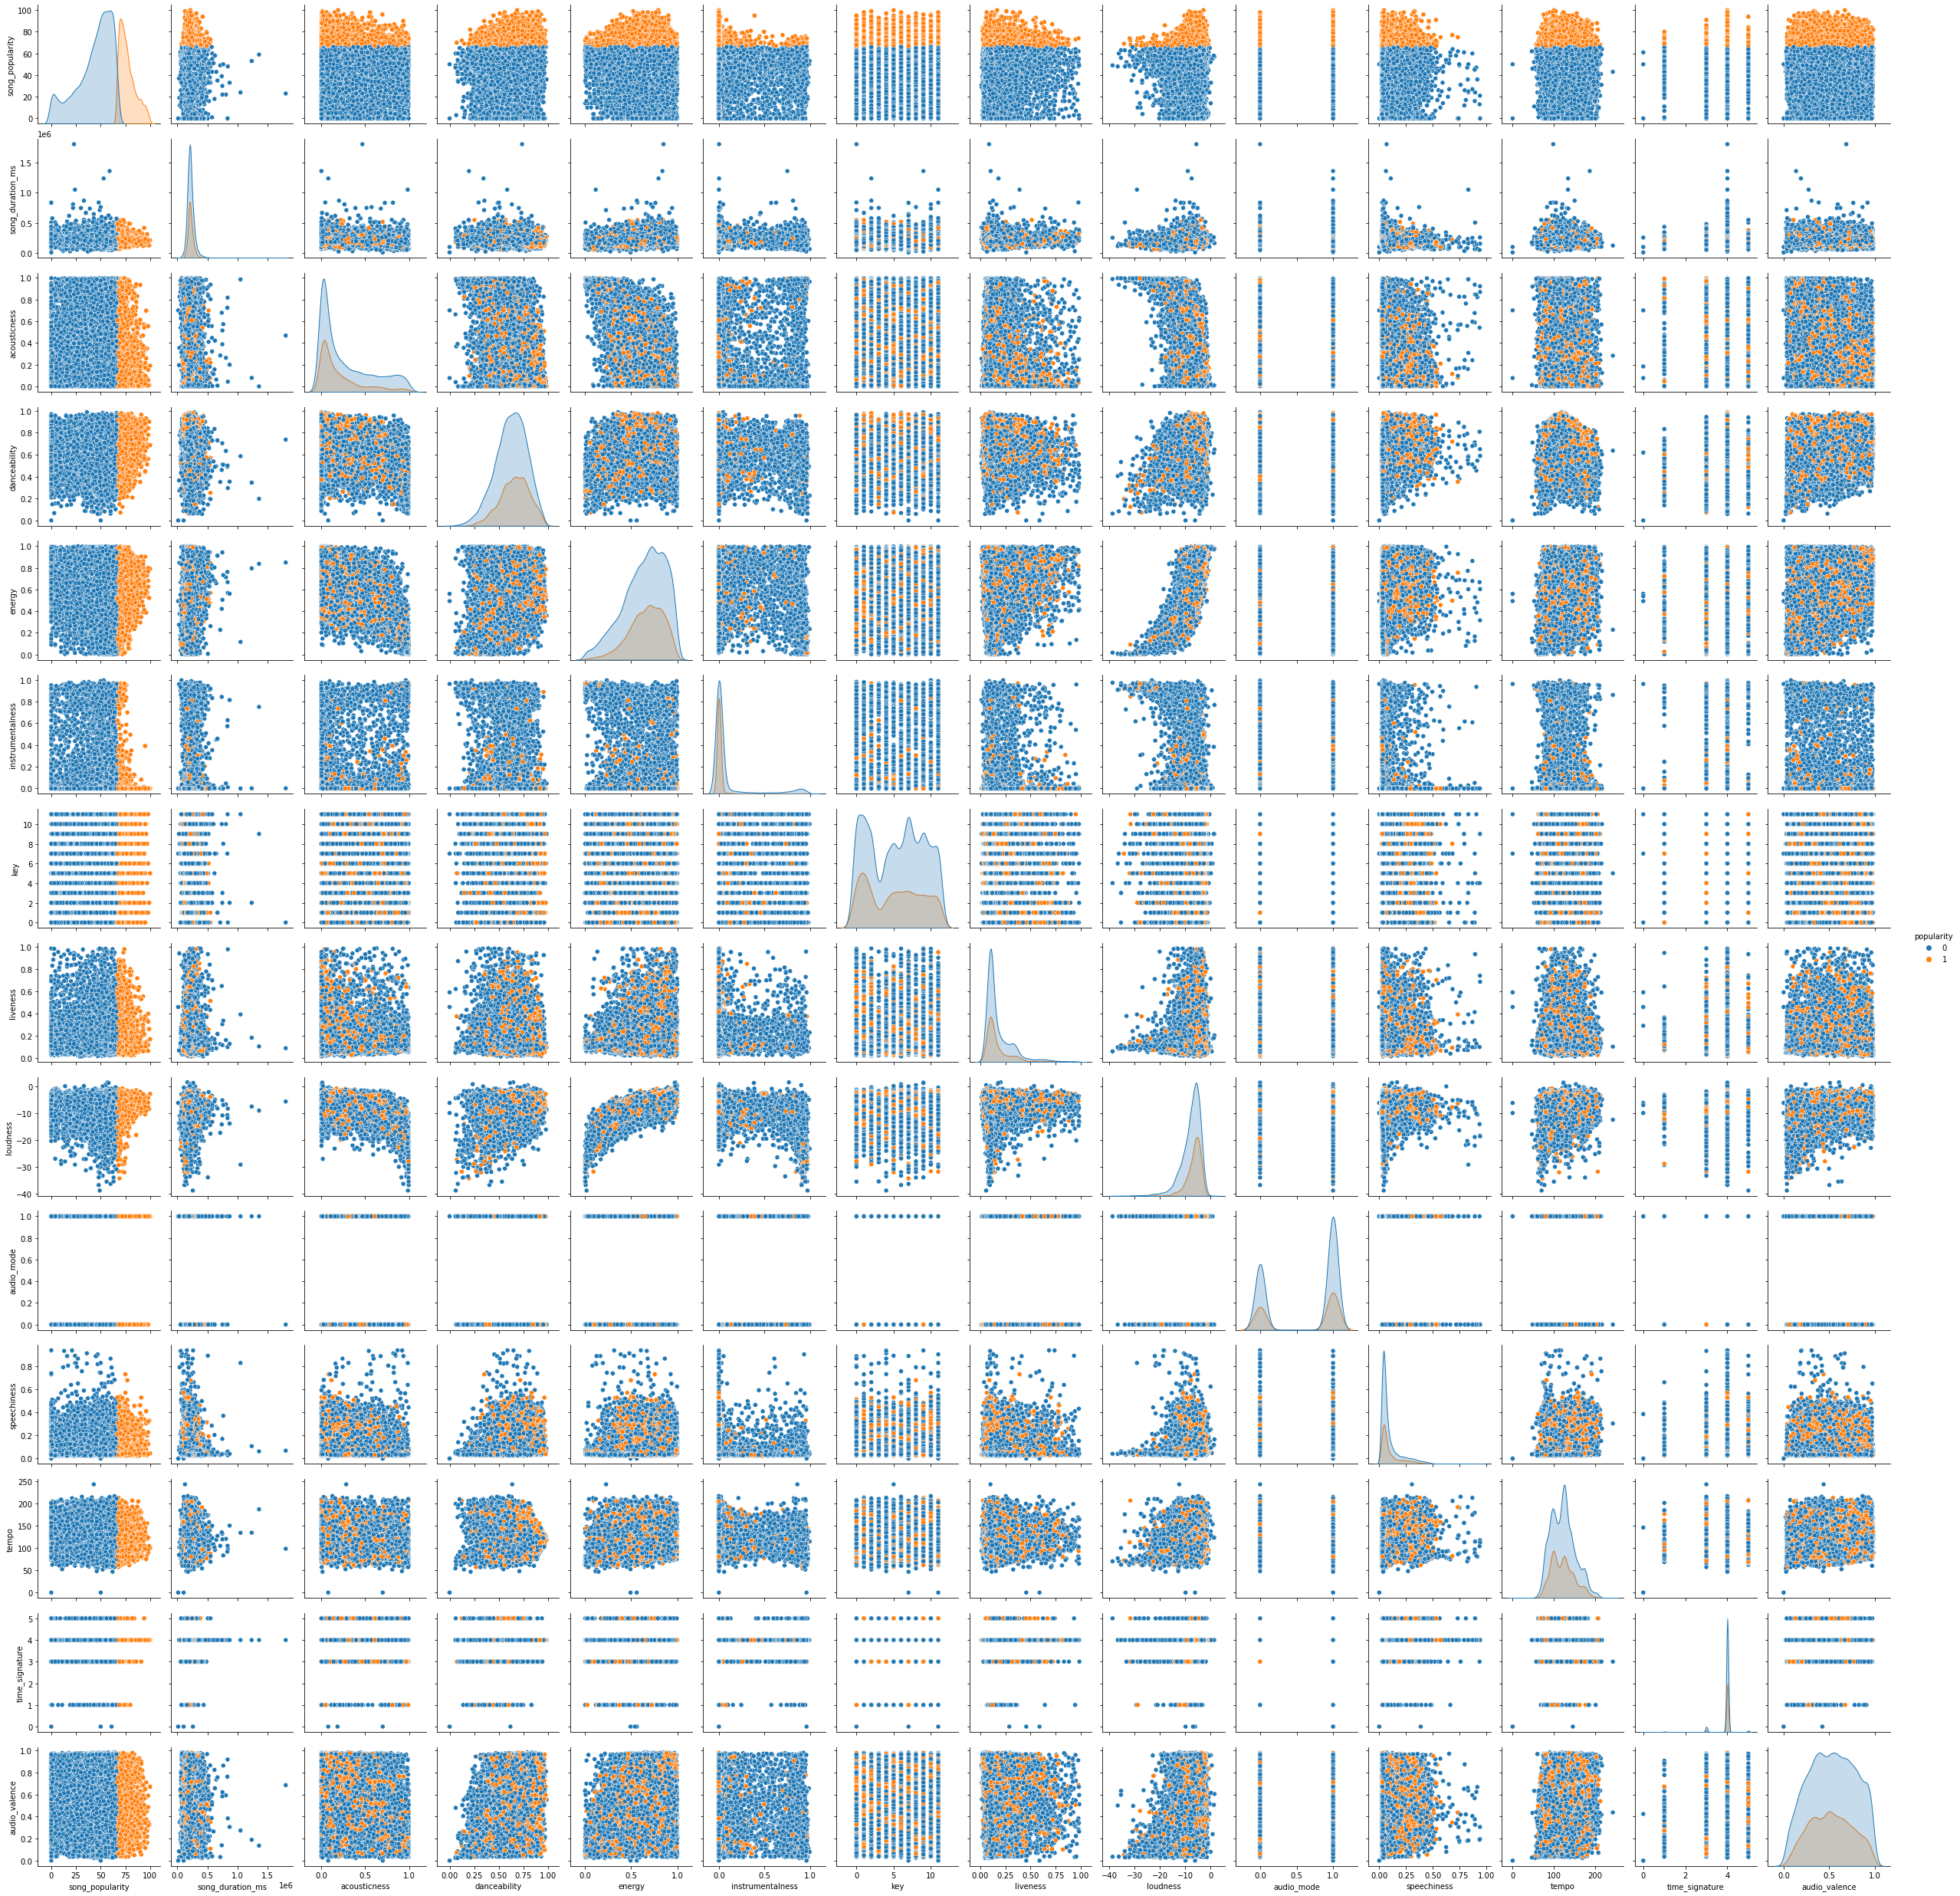

In [9]:
sns.pairplot(data=df, hue="popularity")

In [10]:
#checking for correaltion and using background colors
df.corr().style.background_gradient()

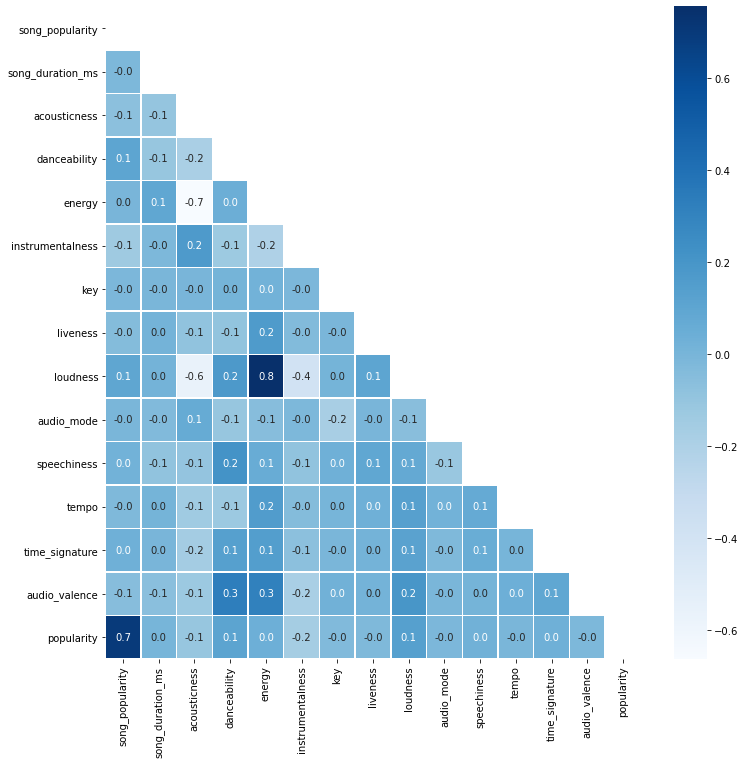

In [11]:
plt.subplots(figsize=(12, 12))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',cmap="Blues",mask=mask)
plt.show()

- Correlation between loudness and energy is 0.8 which is strong and correlation between loudness and accusticness is 0.6 which is moderate. Except two of them all the correlations are quite low. When we compare the correlation between song_popularity and all other features, we don't see a strong correlation (a linear relationship) that gives us a clear information about popularity. Accusticness,danceability and loudness seems to have correlation with popularity feature(0.10) and istrumentalness has 0.20.

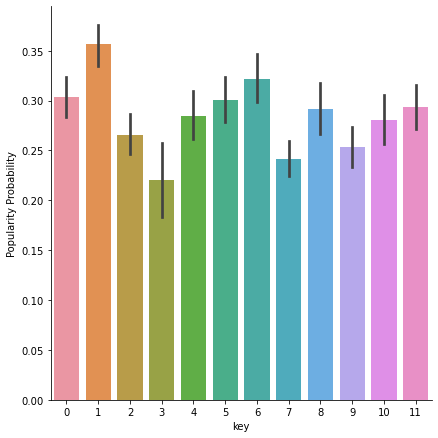

In [12]:
g = sns.factorplot(x = "key", y = "popularity", data = df, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

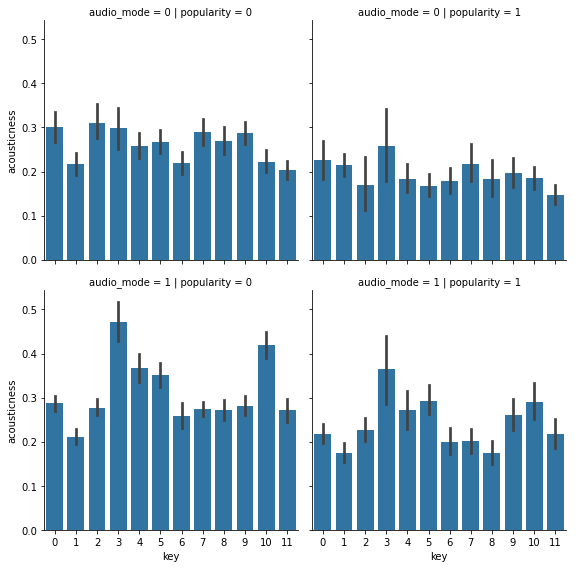

In [13]:
g = sns.FacetGrid(df, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "acousticness")
g.add_legend()
plt.show()

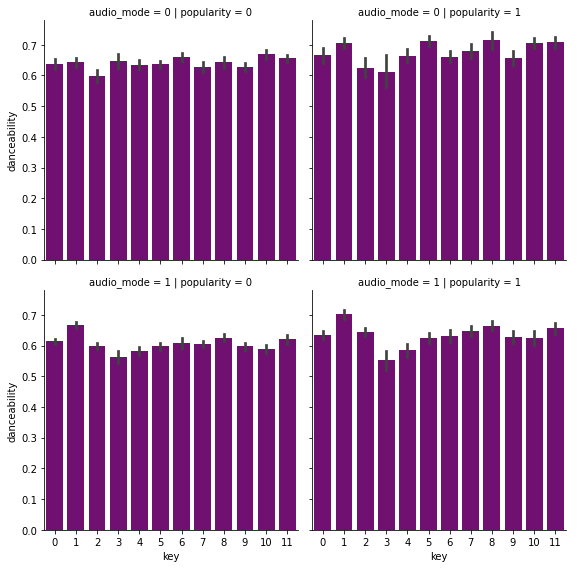

In [14]:
g = sns.FacetGrid(df, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "danceability",color="purple")
g.add_legend()
plt.show()

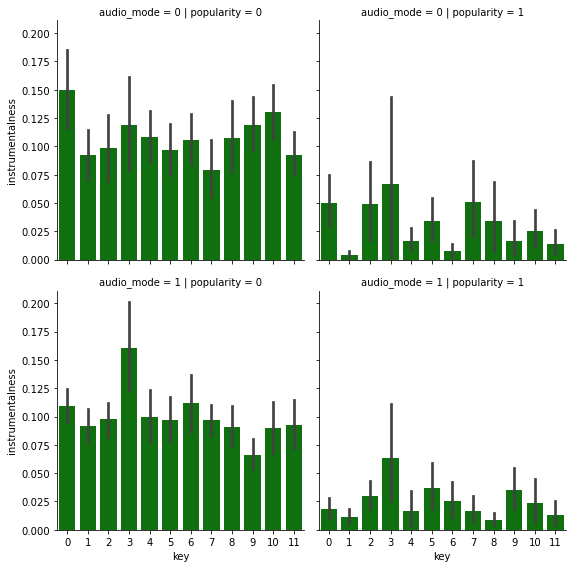

In [15]:
g = sns.FacetGrid(df, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "instrumentalness",color="green")
g.add_legend()
plt.show()

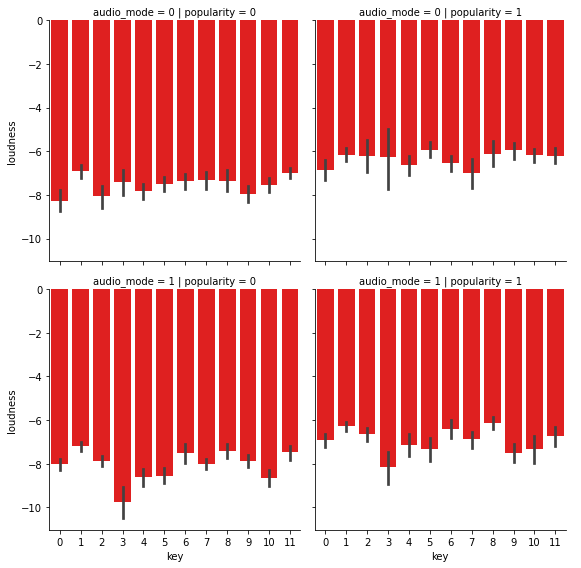

In [16]:
g = sns.FacetGrid(df, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "loudness",color="red")
g.add_legend()
plt.show()

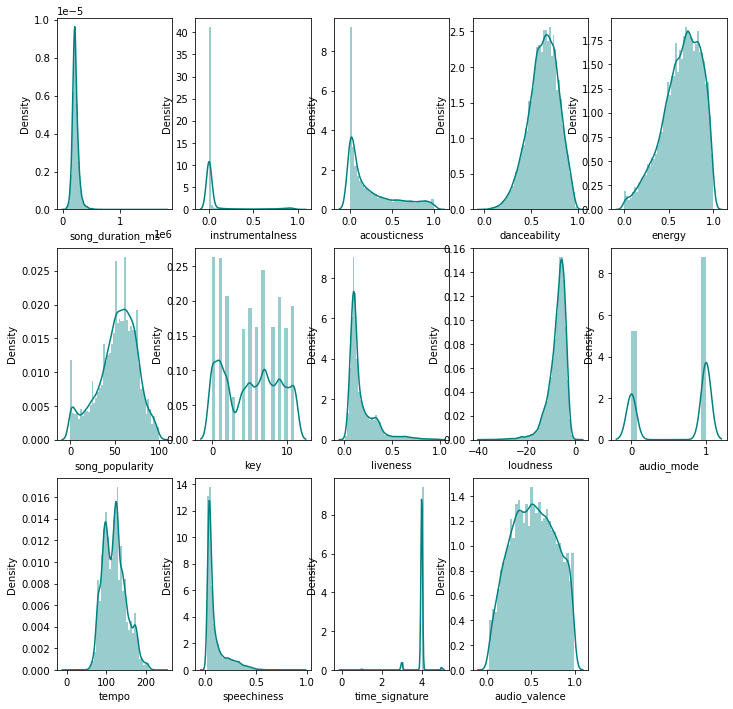

In [17]:
f, axes = plt.subplots(3, 5, figsize=(12, 12))
sns.distplot( df["song_duration_ms"] , color="teal", ax=axes[0, 0])
sns.distplot( df["instrumentalness"] , color="teal", ax=axes[0, 1])
sns.distplot( df["acousticness"] , color="teal", ax=axes[0, 2])
sns.distplot( df["danceability"] , color="teal", ax=axes[0, 3])
sns.distplot( df["energy"] , color="teal", ax=axes[0, 4])
sns.distplot( df["song_popularity"] , color="teal", ax=axes[1, 0])
sns.distplot( df["key"] , color="teal", ax=axes[1, 1])
sns.distplot( df["liveness"] , color="teal", ax=axes[1, 2])
sns.distplot( df["loudness"] , color="teal", ax=axes[1, 3])
sns.distplot( df["audio_mode"] , color="teal", ax=axes[1, 4])
sns.distplot( df["tempo"] , color="teal", ax=axes[2, 0])
sns.distplot( df["speechiness"] , color="teal", ax=axes[2, 1])
sns.distplot( df["time_signature"] , color="teal", ax=axes[2, 2])
sns.distplot( df["audio_valence"] , color="teal", ax=axes[2, 3])
f.delaxes(axes[2][4])
plt.show()

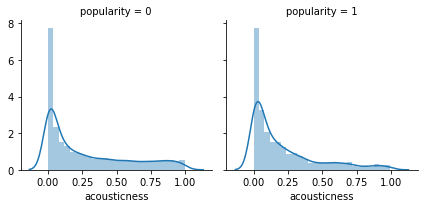

In [18]:
g = sns.FacetGrid(df, col = "popularity")
g.map(sns.distplot, "acousticness", bins = 25)
plt.show()

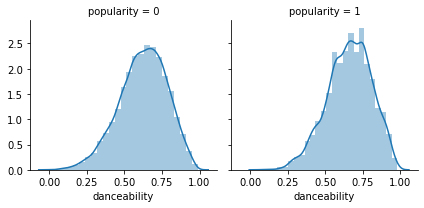

In [19]:
g = sns.FacetGrid(df, col="popularity")
g.map(sns.distplot, "danceability", bins = 25)
plt.show()

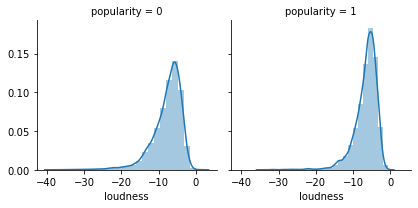

In [20]:
g = sns.FacetGrid(df, col = "popularity")
g.map(sns.distplot, "loudness", bins = 25)
plt.show()

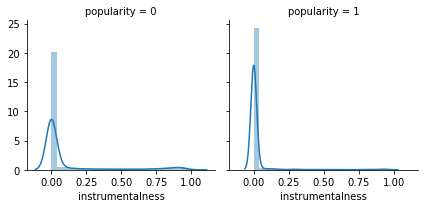

In [21]:
g = sns.FacetGrid(df, col = "popularity")
g.map(sns.distplot, "instrumentalness", bins = 25)
plt.show()

- Data distribution of songs display today's songs features like dancebility, energy, loudness and tempo are quite high. People like fast and loud music.
- According to instrumentalness, liveness and speechness, most of the songs are not live performances and they have lyrics.
- Keys like 0,1,5,6 and 11 seems more effective in songs. And if key== 0 or 1 or 6 song has more chance to be populer.
- Time_signure is mostly 4 and 5 in both populer and general data.
- If danceability>0.6 song has more chance to be popular.
- If loudness > -10 song has more chance to be popular.

In [22]:
df.head()

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  \
0    -4.095           1       0.0294  167.060               4          0.474   
1    -6.407           0       0.0498  105.256               4          0.370   
2    -7.828           1       0.0792  123.881               4          0.324   
3    -4.938           1       0.1070  122.444               4          0.198   
4    -5.065           1       0.0313  172.011               4          0.574   

   popularity  
0           1  
1           0  
2           1  
3           1  
4           0

In [42]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["int64", "float64"])
#dividing the data into catagorical and numerical data

In [24]:
df_cat

song_name
0      Boulevard of Broken Dreams
1                      In The End
2               Seven Nation Army
3                      By The Way
4               How You Remind Me
...                           ...
18830              Let It Breathe
18831                     Answers
18832      Sudden Love (Acoustic)
18833           Gentle on My Mind
18834                    Up to Me

[18835 rows x 1 columns]

In [25]:
df_num

song_popularity  song_duration_ms  acousticness  danceability  energy  \
0                   73            262333      0.005520         0.496   0.682   
1                   66            216933      0.010300         0.542   0.853   
2                   76            231733      0.008170         0.737   0.463   
3                   74            216933      0.026400         0.451   0.970   
4                   56            223826      0.000954         0.447   0.766   
...                ...               ...           ...           ...     ...   
18830               60            159645      0.893000         0.500   0.151   
18831               60            205666      0.765000         0.495   0.161   
18832               23            182211      0.847000         0.719   0.325   
18833               55            352280      0.945000         0.488   0.326   
18834               60            193533      0.911000         0.640   0.381   

       instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0              0.000029    8    0.0589    -4.095           1       0.0294   
1              0.000000    3    0.1080    -6.407           0       0.0498   
2              0.447000    0    0.2550    -7.828           1       0.0792   
3              0.003550    0    0.1020    -4.938           1       0.1070   
4              0.000000   10    0.1130    -5.065           1       0.0313   
...                 ...  ...       ...       ...         ...          ...   
18830          0.000065   11    0.1110   -16.107           1       0.0348   
18831          0.000001   11    0.1050   -14.078           0       0.0301   
18832          0.000000    0    0.1250   -12.222           1       0.0355   
18833          0.015700    3    0.1190   -12.020           1       0.0328   
18834          0.000254    4    0.1040   -11.790           1       0.0302   

         tempo  time_signature  audio_valence  popularity  
0      167.060               4          0.474           1  
1      105.256               4          0.370           0  
2      123.881               4          0.324           1  
3      122.444               4          0.198           1  
4      172.011               4          0.574           0  
...        ...             ...            ...         ...  
18830  113.969               4          0.300           0  
18831   94.286               4          0.265           0  
18832  130.534               4          0.286           0  
18833  106.063               4          0.323           0  
18834   91.490               4          0.581           0  

[18835 rows x 15 columns]

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
for cols in df_cat:
    le = LabelEncoder()
    df_cat[cols] = le.fit_transform(df_cat[cols])

In [28]:
df_cat

song_name
0           1561
1           5541
2           9638
3           1760
4           4988
...          ...
18830       6322
18831        687
18832      10447
18833       4131
18834      11775

[18835 rows x 1 columns]

In [29]:
df = pd.concat([df_cat,df_num], axis=1)

In [30]:
df.head()

song_name  song_popularity  song_duration_ms  acousticness  danceability  \
0       1561               73            262333      0.005520         0.496   
1       5541               66            216933      0.010300         0.542   
2       9638               76            231733      0.008170         0.737   
3       1760               74            216933      0.026400         0.451   
4       4988               56            223826      0.000954         0.447   

   energy  instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0   0.682          0.000029    8    0.0589    -4.095           1       0.0294   
1   0.853          0.000000    3    0.1080    -6.407           0       0.0498   
2   0.463          0.447000    0    0.2550    -7.828           1       0.0792   
3   0.970          0.003550    0    0.1020    -4.938           1       0.1070   
4   0.766          0.000000   10    0.1130    -5.065           1       0.0313   

     tempo  time_signature  audio_valence  popularity  
0  167.060               4          0.474           1  
1  105.256               4          0.370           0  
2  123.881               4          0.324           1  
3  122.444               4          0.198           1  
4  172.011               4          0.574           0

## dividing the dataset in x and y

In [31]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [32]:
x

song_name  song_popularity  song_duration_ms  acousticness  \
0           1561               73            262333      0.005520   
1           5541               66            216933      0.010300   
2           9638               76            231733      0.008170   
3           1760               74            216933      0.026400   
4           4988               56            223826      0.000954   
...          ...              ...               ...           ...   
18830       6322               60            159645      0.893000   
18831        687               60            205666      0.765000   
18832      10447               23            182211      0.847000   
18833       4131               55            352280      0.945000   
18834      11775               60            193533      0.911000   

       danceability  energy  instrumentalness  key  liveness  loudness  \
0             0.496   0.682          0.000029    8    0.0589    -4.095   
1             0.542   0.853          0.000000    3    0.1080    -6.407   
2             0.737   0.463          0.447000    0    0.2550    -7.828   
3             0.451   0.970          0.003550    0    0.1020    -4.938   
4             0.447   0.766          0.000000   10    0.1130    -5.065   
...             ...     ...               ...  ...       ...       ...   
18830         0.500   0.151          0.000065   11    0.1110   -16.107   
18831         0.495   0.161          0.000001   11    0.1050   -14.078   
18832         0.719   0.325          0.000000    0    0.1250   -12.222   
18833         0.488   0.326          0.015700    3    0.1190   -12.020   
18834         0.640   0.381          0.000254    4    0.1040   -11.790   

       audio_mode  speechiness    tempo  time_signature  audio_valence  
0               1       0.0294  167.060               4          0.474  
1               0       0.0498  105.256               4          0.370  
2               1       0.0792  123.881               4          0.324  
3               1       0.1070  122.444               4          0.198  
4               1       0.0313  172.011               4          0.574  
...           ...          ...      ...             ...            ...  
18830           1       0.0348  113.969               4          0.300  
18831           0       0.0301   94.286               4          0.265  
18832           1       0.0355  130.534               4          0.286  
18833           1       0.0328  106.063               4          0.323  
18834           1       0.0302   91.490               4          0.581  

[18835 rows x 15 columns]

In [33]:
y

0        1
1        0
2        1
3        1
4        0
        ..
18830    0
18831    0
18832    0
18833    0
18834    0
Name: popularity, Length: 18835, dtype: int64

## creating & testing the model and aslo dividing them itno training and testing data

In [34]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
logreg = LogisticRegression()
knn = KNeighborsClassifier()

In [36]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print(classification_report(ytest, ypred))

In [37]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4045
           1       0.75      0.78      0.77      1606

    accuracy                           0.86      5651
   macro avg       0.83      0.84      0.84      5651
weighted avg       0.87      0.86      0.87      5651



In [38]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      4045
           1       0.52      0.47      0.50      1606

    accuracy                           0.73      5651
   macro avg       0.66      0.65      0.66      5651
weighted avg       0.72      0.73      0.72      5651



In [39]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(logreg, x,y, cv=15, scoring="accuracy")
print(f"Avg. Accuracy-: {cvs.mean()}")

Avg. Accuracy-: 0.8714639531047782


## HyperParameter Tuning

In [40]:
logreg = LogisticRegression(solver="liblinear")
logreg.fit(xtrain, ytrain)
ypred = logreg.predict(xtest)
print(accuracy_score(ytest, ypred))
print()
print(classification_report(ytest, ypred))
print()
print(confusion_matrix(ytest, ypred))

0.8635639709785878

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      4045
           1       0.77      0.74      0.76      1606

    accuracy                           0.86      5651
   macro avg       0.83      0.83      0.83      5651
weighted avg       0.86      0.86      0.86      5651


[[3686  359]
 [ 412 1194]]


In [41]:
cvs = cross_val_score(logreg, x,y, cv=10, scoring="accuracy")
print(f"Avg. Accuracy-: {cvs.mean()}\nStandard Deviation -: {cvs.std()}")

Avg. Accuracy-: 0.8604216912299455
Standard Deviation -: 0.027256269642031036


# Conclusion

- we saw that the correlation between loudness and energy was high and correlation between loudness and accousticness was moderate rest all the correlation were quite low
- also found that nowadays people like more loud and energetic songs and accorduing to these which song might be on the top list of spotify for a long time
- if the loudness of the song is greater than -10dB than there is a chance of that song getting popular in the today's generation
- and also got to know that nowadays people only listen to song that are about 3 to 4 mins long. if the song is above that time duration they simply dont listen or they just skip the song
- after all the eda and model training we get the the conclusion is that the logistic regression model gives the best accuracy for this data set.
- with the accuracy of 86% logistic regression givs the best accuracy
